# Required Libraries in this project froM Thomas Basyal

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. csv data loading 

In [3]:
df = pd.read_csv("/content/drive/MyDrive/NLP Projects/News_DATA.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [4]:
import seaborn as sns


# 2. Data Analysis using python functions

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [7]:
df.shape

(20800, 5)

In [8]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df = df.dropna() #Handled Missing values by droping those rows

In [10]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
df.shape

(18285, 5)

In [12]:
df.reset_index(inplace=True)
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [13]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [14]:
df['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [15]:
df['title'][2:4]

2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
Name: title, dtype: object

In [16]:
df = df.drop(['id','text','author'],axis = 1)
df.head()

,index,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


# 3. MR thomas basyal is working on Data Preprocessing

## 1.Tokenization

In [17]:
sample_data = 'The quick brown fox jumps over the lazy dog'
sample_data = sample_data.split()
sample_data

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

## 2. Make Lowercase

In [18]:
sample_data = [data.lower() for data in sample_data]
sample_data

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

## 3. Remove Stopwords

In [19]:
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')

print(stopwords[0:10])
print(len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
179


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
sample_data = [data for data in sample_data if data not in stopwords]
print(sample_data)
len(sample_data)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


6

## 4. Stemming

In [21]:
ps = PorterStemmer()
sample_data_stemming = [ps.stem(data) for data in sample_data]
print(sample_data_stemming)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


## 5. Lemmatization

In [22]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = WordNetLemmatizer()
sample_data_lemma = [lm.lemmatize(data) for data in sample_data]
print(sample_data_lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


In [23]:
nltk.download('wordnet')
lm = WordNetLemmatizer()
corpus = []
for i in range (len(df)):
    review = re.sub('^a-zA-Z0-9',' ', df['title'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(x) for x in review if x not in stopwords]
    review = " ".join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
len(corpus)

18285

In [25]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [26]:
corpus[0]

'house dem aide: didn’t even see comey’s letter jason chaffetz tweeted'

# 4. Vectorization (Convert Text data into the Vector)

In [27]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Data splitting into the train and test

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10, stratify = y )

In [30]:
len(x_train),len(y_train)

(12799, 12799)

In [31]:
len(x_test), len(y_test)

(5486, 5486)

# 5. Model Building

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

# 6. Model Evaluation

In [33]:
y_pred = rf.predict(x_test)
accuracy_score_ = accuracy_score(y_test,y_pred) 
accuracy_score_

0.93802406124681

In [34]:
class Evaluation:
    
    def __init__(self,model,x_train,x_test,y_train,y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_evaluation(self):
        y_pred_train = self.model.predict(self.x_train)
        
        acc_scr_train = accuracy_score(self.y_train,y_pred_train)
        print("Accuracy Score On Training Data Set :",acc_scr_train)
        print()
        
        con_mat_train = confusion_matrix(self.y_train,y_pred_train)
        print("Confusion Matrix On Training Data Set :\n",con_mat_train)
        print()
        
        class_rep_train = classification_report(self.y_train,y_pred_train)
        print("Classification Report On Training Data Set :\n",class_rep_train)
        
        
    def test_evaluation(self):
        y_pred_test = self.model.predict(self.x_test)
        
        acc_scr_test = accuracy_score(self.y_test,y_pred_test)
        print("Accuracy Score On Testing Data Set :",acc_scr_test)
        print()
        
        con_mat_test = confusion_matrix(self.y_test,y_pred_test)
        print("Confusion Matrix On Testing Data Set :\n",con_mat_test)
        print()
        
        class_rep_test = classification_report(self.y_test,y_pred_test)
        print("Classification Report On Testing Data Set :\n",class_rep_test)

        
        

In [35]:
#Checking the accuracy on training dataset

Evaluation(rf,x_train, x_test, y_train, y_test).train_evaluation()


Accuracy Score On Training Data Set : 1.0

Confusion Matrix On Training Data Set :
 [[7252    0]
 [   0 5547]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7252
           1       1.00      1.00      1.00      5547

    accuracy                           1.00     12799
   macro avg       1.00      1.00      1.00     12799
weighted avg       1.00      1.00      1.00     12799



In [36]:
#Checking the accuracy on testing dataset
Evaluation(rf,x_train, x_test, y_train, y_test).test_evaluation()

Accuracy Score On Testing Data Set : 0.93802406124681

Confusion Matrix On Testing Data Set :
 [[2829  280]
 [  60 2317]]

Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      3109
           1       0.89      0.97      0.93      2377

    accuracy                           0.94      5486
   macro avg       0.94      0.94      0.94      5486
weighted avg       0.94      0.94      0.94      5486



# Prediction Pipeline

In [37]:
class Preprocessing:
    
    def __init__(self,data):
        self.data = data
        
    def text_preprocessing_user(self):
        lm = WordNetLemmatizer()
        pred_data = [self.data]    
        preprocess_data = []
        for data in pred_data:
            review = re.sub('^a-zA-Z0-9',' ', data)
            review = review.lower()
            review = review.split()
            review = [lm.lemmatize(x) for x in review if x not in stopwords]
            review = " ".join(review)
            preprocess_data.append(review)
        return preprocess_data    

In [38]:
df['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [39]:
data = 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
Preprocessing(data).text_preprocessing_user()

['flynn: hillary clinton, big woman campus - breitbart']

In [40]:
class Prediction:
    
    def __init__(self,pred_data, model):
        self.pred_data = pred_data
        self.model = model
        
    def prediction_model(self):
        preprocess_data = Preprocessing(self.pred_data).text_preprocessing_user()
        data = tf.transform(preprocess_data)
        prediction = self.model.predict(data)
        
        if prediction [0] == 0 :
            return "The News Is Fake!!! be concerned about the fake news"
        
        else:
            return "The News Is Real(its not fake)! Hope you are concerned about it"
        

In [41]:
data = 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
Prediction(data,rf).prediction_model()

'The News Is Fake!!! be concerned about the fake news'

In [42]:
df['title'][3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [43]:
user_data = '15 Civilians Killed In Single US Airstrike Have Been Identified' 
Prediction(user_data,rf).prediction_model()

'The News Is Real(its not fake)! Hope you are concerned about it'

In [52]:
confusion_matrix_train_data= [[7252, 0],[0, 5547]] 

In [66]:
class_labels = ['True', 'False']


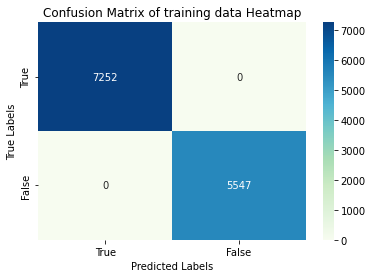

In [67]:
sns.heatmap(confusion_matrix_train_data, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='GnBu')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of training data Heatmap')
plt.show()


In [69]:
confusion_matrix_test_data= [[2829, 280],[60, 2317]] 

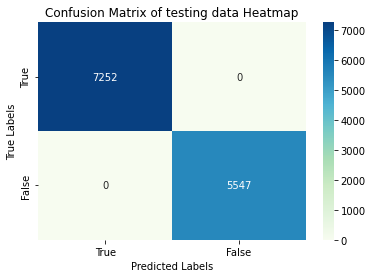

In [71]:
class_labels = ['True', 'False']
sns.heatmap(confusion_matrix_train_data, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='GnBu')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of testing data Heatmap')
plt.show()

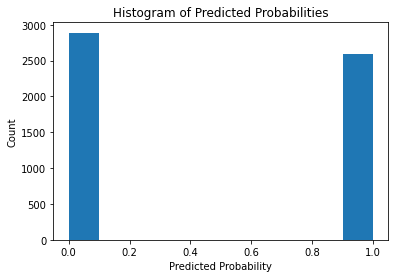

In [72]:
plt.hist(y_pred, bins=10)

# Add labels and title
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Histogram of Predicted Probabilities')

# Show the plot
plt.show()